In [1]:
#Import libraries and dependencies
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import mmread

import warnings
from itertools import combinations

warnings.filterwarnings('ignore')

# Graph Visualization & Basic EDA

## Overview

Dataset: https://networkrepository.com/road-chesapeake.php


The data consists of the Chesapeake, VA road network. It sapns 39 nodes and 170 edges. The file was retrieved from networkrepository.com where it was downloaded in a .mtx format.

## Data Import to graph

In [2]:
a = mmread('data/road-chesapeake/road-chesapeake.mtx')
G = nx.Graph(a)

In [3]:
#Identify graph type
type(G)

networkx.classes.graph.Graph

## Visualizing Graph Object With networkX

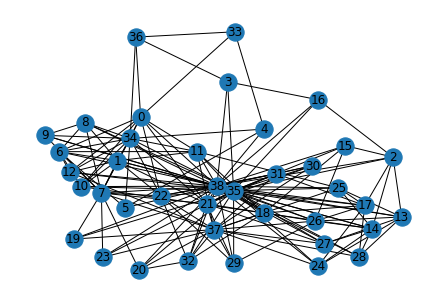

In [4]:
nx.draw(G, with_labels=True)

In [5]:
#Visualizing networkx graph object with pyvis
def draw_graph3(networkx_graph,notebook=True,output_filename='graph.html',show_buttons=True,only_physics_buttons=False):
    """
    This function accepts a networkx graph object,
    converts it to a pyvis network object preserving its node and edge attributes,
    and both returns and saves a dynamic network visualization.
    
    Valid node attributes include:
        "size", "value", "title", "x", "y", "label", "color".
        
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)
        
    Valid edge attributes include:
        "arrowStrikethrough", "hidden", "physics", "title", "value", "width"
        
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)
        
    
    Args:
        networkx_graph: The graph to convert and display
        notebook: Display in Jupyter?
        output_filename: Where to save the converted network
        show_buttons: Show buttons in saved version of network?
        only_physics_buttons: Show only buttons controlling physics of network?
    """
    
    # import
    from pyvis import network as net
    
    # make a pyvis network
    pyvis_graph = net.Network(notebook=notebook)
    
    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        pyvis_graph.add_node(str(node),**node_attrs)
        
    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            # place at key 'value' the weight of the edge
            edge_attrs['value']=edge_attrs['weight']
        # add the edge
        pyvis_graph.add_edge(str(source),str(target),**edge_attrs)
        
    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()
    
    # return and also save
    return pyvis_graph.show(output_filename)

draw_graph3(G)

#reference: https://gist.github.com/quadrismegistus/92a7fba479fc1e7d2661909d19d4ae7e

graph.html


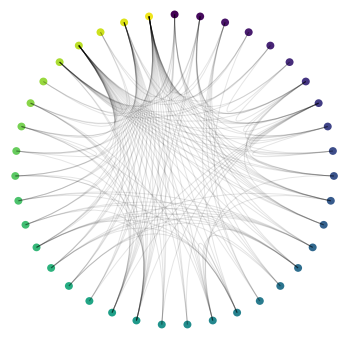

<Figure size 576x576 with 0 Axes>

In [6]:
# Make a Circos plot of the graph
import numpy as np
from circos import CircosPlot

nodes = sorted(G.nodes())
edges = G.edges()
edgeprops = dict(alpha=0.1)
nodecolor = plt.cm.viridis(np.arange(len(nodes)) / len(nodes)) 
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
c = CircosPlot(nodes, edges, radius=10, ax=ax, edgeprops=edgeprops, nodecolor=nodecolor)
c.draw()

<AxesSubplot:>

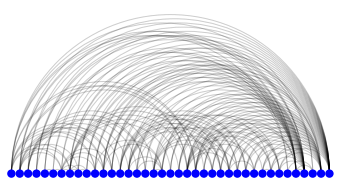

In [7]:
#Plot arc
import nxviz as nv 
from nxviz import annotate, plots

nv.arc(G)


In [8]:
#Plot hive - Did not work as data does not have attribute information to groupby.
#nv.hive(G)
#annotate.hive_group(G)

## Get Graph Statistics

In [9]:
#Get length of nodes and edges
len(G.nodes()), len(G.edges())

(39, 170)

In [10]:
#Get list of neighbors for a single node
list(G.neighbors(7))

[0, 1, 6, 8, 9, 19, 20, 21, 22, 23, 34, 37, 38]

In [11]:
#Initialize function to get node neighbor data. 
#Returns a pandas df with node as index and a col with the list of neighboring nodes

def get_all_node_neighbors(graph):
    neighbor_lst = []
    neighbor_cnt_lst = []
    for n in G:
        #Get list of neighbors and count for each node
        neighbor_lst.append(list(G.neighbors(n)))
        neighbor_cnt_lst.append(len(list(G.neighbors(n))))
        
    #append node lists into a df
    neighbor_df = pd.DataFrame(
        {'Node': list(G.nodes()),
         'Neighbor_Count': neighbor_cnt_lst, 
         'Neighbors': neighbor_lst
        }).set_index('Node')
        
    return neighbor_df
        
df = get_all_node_neighbors(G)

In [12]:
df

,Neighbor_Count,Neighbors
Node,,
0,11,"[6, 7, 10, 11, 12, 21, 22, 33, 34, 36, 38]"
1,11,"[6, 7, 8, 10, 11, 12, 21, 22, 34, 35, 38]"
2,7,"[13, 14, 15, 16, 17, 35, 38]"
3,4,"[16, 35, 36, 38]"
4,4,"[5, 33, 34, 38]"
5,4,"[4, 6, 34, 38]"
6,10,"[0, 1, 5, 7, 8, 10, 11, 12, 34, 38]"
7,13,"[0, 1, 6, 8, 9, 19, 20, 21, 22, 23, 34, 37, 38]"
8,7,"[1, 6, 7, 9, 34, 35, 38]"


In [13]:
#Get top n most connected nodes. For this dataset that may be main roads.
df.sort_values('Neighbor_Count',ascending = False).head(5)


,Neighbor_Count,Neighbors
Node,,
38,33,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
35,29,"[1, 2, 3, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17..."
37,18,"[7, 11, 12, 18, 19, 20, 21, 22, 23, 24, 25, 26..."
34,15,"[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 21, 22, 3..."
7,13,"[0, 1, 6, 8, 9, 19, 20, 21, 22, 23, 34, 37, 38]"


In [14]:
#Get maximum degree in graph
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
print(dmax)

33


In [15]:
#Get average degree in graph
davg = int(round(sum(degree_sequence)/len(degree_sequence),0))
print(davg)

9


In [16]:
#Get list of triangles and number of triangles in graph
print(nx.triangles(G), '\n')
print(len(nx.triangles(G)))

{0: 22, 1: 31, 2: 10, 3: 2, 4: 2, 5: 4, 6: 26, 7: 31, 8: 15, 9: 7, 10: 12, 11: 16, 12: 10, 13: 12, 14: 14, 15: 6, 16: 4, 17: 14, 18: 14, 19: 2, 20: 5, 21: 31, 22: 20, 23: 2, 24: 6, 25: 9, 26: 15, 27: 7, 28: 6, 29: 10, 30: 7, 31: 12, 32: 12, 33: 1, 34: 36, 35: 56, 36: 2, 37: 20, 38: 71} 

39


In [17]:
#Get average clustering coefficient - the measure of degree to which nodes in a graph tend to cluster together
nx.average_clustering(G)

0.45023709979046217

In [18]:
#Get diameter of graph - shortest path between the most distanced nodes.
nx.diameter(G)

3

In [19]:
#Get Degree Centrality
dcs = pd.Series(nx.degree_centrality(G))
print(dcs)

#Get betweeness centrality
bc = pd.Series(nx.betweenness_centrality(G))
print(max(bc))

0     0.289474
1     0.289474
2     0.184211
3     0.105263
4     0.105263
5     0.105263
6     0.263158
7     0.342105
8     0.184211
9     0.131579
10    0.184211
11    0.236842
12    0.184211
13    0.210526
14    0.236842
15    0.131579
16    0.105263
17    0.236842
18    0.236842
19    0.105263
20    0.131579
21    0.342105
22    0.263158
23    0.105263
24    0.157895
25    0.184211
26    0.236842
27    0.157895
28    0.157895
29    0.157895
30    0.131579
31    0.184211
32    0.184211
33    0.078947
34    0.394737
35    0.763158
36    0.105263
37    0.473684
38    0.868421
dtype: float64
0.3408661232459859


In [20]:
#Get list of cliques
len(list(nx.find_cliques(G)))

139

In [21]:
#Check if the graph is biconnected
print(nx.is_biconnected(G))

True


## Discussion on Findings

1. The graph was found to have 39 nodes and 170 edges.
2. The maximum degree is 33, whereas its average is 9.
3. There are a total of 39 triangles in the graph.
4. The degree of clustering was found to be 0.45.
5. The diameter of the graph is 3.
6. The maximum betweeness centrality was found to be 0.34 (Bottleneck).
7. A total of 139 cliques were found in the graph.
8. The graph is considered to be biconnected.

References:  
https://notebook.community/SubhankarGhosh/NetworkX/4.%20Cliques,%20Triangles%20and%20Graph%20Structures%20(Instructor)
https://github.com/ericmjl/Network-Analysis-Made-Simple/tree/master/notebooks
